In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
!pip install seaborn
#import all libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

     |████████████████████████████████| 296kB 25.1MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
world_cup = pd.read_csv('World Cup 2019 Dataset.csv')
results = pd.read_csv('results.csv')

In [8]:
#narrowing to team patcipating in the world cup
worldcup_teams = ['England', ' South Africa', '', 'West Indies', 
            'Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan', 
            'Australia', 'Bangladesh', 'India']

In [9]:
#cleaning date column for exploration
results.loc[results.date == 'Jul 3-4, 2010', 'date'] = '03-07-2010'
results.loc[results.date == 'Aug 19-20, 2010', 'date'] = '19-08-2010'
results.loc[results.date == 'Jul 11-12, 2012', 'date'] = '11-07-2013'
results.loc[results.date == 'Jul 2-3, 2013', 'date'] = '02-07-2013'
results.loc[results.date == 'Jul 7-8, 2013', 'date'] = '03-07-2013'
results.loc[results.date == 'Aug 27-28, 2013', 'date'] = '27-08-2013'
results.loc[results.date == 'Dec 10-11, 2014', 'date'] = '10-12-2014'

In [10]:
df_teams_final  = results[(results['Team_1'].isin(worldcup_teams)) & (results['Team_2'].isin(worldcup_teams))]

In [11]:
#df_teams_1 = results[results['Team_1'].isin(worldcup_teams)]
#df_teams_2 = results[results['Team_2'].isin(worldcup_teams)]
#df_teams = pd.concat((df_teams_1, df_teams_2))
#df_teams.drop_duplicates()

In [12]:
year = []
for row in df_teams_final['date']:
    year.append(int(row[7:]))
df_teams_final['match_year']= year
df_teams_2011 = df_teams_final
#df_teams_2011 = df_teams_final[df_teams_final.match_year >= 11]

In [13]:
#dropping columns that wll not affect match outcomes
df_teams_2011 = df_teams_2011.drop(['date','Margin', 'Ground','match_year'], axis=1)
df_teams_2011.head()

,Team_1,Team_2,Winner
0,Bangladesh,Sri Lanka,Sri Lanka
1,India,Sri Lanka,Sri Lanka
2,Bangladesh,India,India
3,Bangladesh,Sri Lanka,Sri Lanka
4,India,Sri Lanka,India


In [14]:
#Building the model
#the prediction label: The winning_team column will show "1" Team 1 has won and "2" if the away team has won.

df_teams_2011 = df_teams_2011.reset_index(drop=True)
df_teams_2011.loc[df_teams_2011.Winner == df_teams_2011.Team_1,'winning_team']=1
df_teams_2011.loc[df_teams_2011.Winner == df_teams_2011.Team_2, 'winning_team']=2
df_teams_2011 = df_teams_2011.drop(['winning_team'], axis=1)

df_teams_2011.head()

,Team_1,Team_2,Winner
0,Bangladesh,Sri Lanka,Sri Lanka
1,India,Sri Lanka,Sri Lanka
2,Bangladesh,India,India
3,Bangladesh,Sri Lanka,Sri Lanka
4,India,Sri Lanka,India


In [15]:
#convert team-1 and team-2 from categorical variables to continous inputs 
# Get dummy variables
final = pd.get_dummies(df_teams_2011, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

# Separate X and y sets
X = final.drop(['Winner'], axis=1)
y = final["Winner"]


# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [16]:
final.head()

,Winner,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_England,Team_1_India,Team_1_New Zealand,Team_1_Pakistan,Team_1_Sri Lanka,Team_1_West Indies,Team_2_Afghanistan,Team_2_Australia,Team_2_Bangladesh,Team_2_England,Team_2_India,Team_2_New Zealand,Team_2_Pakistan,Team_2_Sri Lanka,Team_2_West Indies
0,Sri Lanka,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Sri Lanka,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,India,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Sri Lanka,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,India,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [17]:
rf = RandomForestClassifier(n_estimators=100, max_depth=7,
                              random_state=101)
rf.fit(X_train, y_train) 


score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)


print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.701
Test set accuracy:  0.633


In [18]:
#leveraging ICC rankings
#the team which is positioned higher on the ICC Ranking will be considered "favourite" for the match
#and therefore, will be positioned under the "Team_1" column

# Loading new datasets
ranking = pd.read_csv('icc_rankings.csv') 
fixtures = pd.read_csv('fixtures.csv')

In [19]:
# Create new columns with ranking position of each team
fixtures.insert(1, 'first_position', fixtures['Team_1'].map(ranking.set_index('Team')['Position']))
fixtures.insert(2, 'second_position', fixtures['Team_2'].map(ranking.set_index('Team')['Position']))

# We only need the group stage games, so we have to slice the dataset
fixtures = fixtures.iloc[:45, :]
fixtures.tail()

,Round Number,first_position,second_position,Date,Location,Team_1,Team_2,Group,Result
40,1,1.0,4.0,3/7/2019,"Riverside Ground, Chester-le-Street",England,New Zealand,Group A,NaN
41,1,10.0,8.0,4/7/2019,"Headingley, Leeds",Afghanistan,West Indies,Group A,NaN
42,1,6.0,7.0,5/7/2019,"Lord's, London",Pakistan,Bangladesh,Group A,NaN
43,1,9.0,2.0,6/7/2019,"Headingley, Leeds",Sri Lanka,India,Group A,NaN
44,1,5.0,3.0,6/7/2019,"Emirates Old Trafford, Manchester",Australia,South Africa,Group A,NaN


In [20]:
# Loop to add teams to new prediction dataset based on the ranking position of each team
pred_set = []
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'Team_1': row['Team_1'], 'Team_2': row['Team_2'], 'winning_team': None})
    else:
        pred_set.append({'Team_1': row['Team_2'], 'Team_2': row['Team_1'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set
pred_set.head()

,Team_1,Team_2,winning_team
0,England,South Africa,None
1,Pakistan,West Indies,None
2,New Zealand,Sri Lanka,None
3,Australia,Afghanistan,None
4,South Africa,Bangladesh,None


In [21]:
# Get dummy variables and drop winning_team column
pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

# Add missing columns compared to the model's training dataset
missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]


pred_set = pred_set.drop(['Winner'], axis=1)
pred_set.head()

,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_England,Team_1_India,Team_1_New Zealand,Team_1_Pakistan,Team_1_Sri Lanka,Team_1_West Indies,Team_2_Afghanistan,Team_2_Australia,Team_2_Bangladesh,Team_2_England,Team_2_India,Team_2_New Zealand,Team_2_Pakistan,Team_2_Sri Lanka,Team_2_West Indies
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [22]:
#group matches 
def group_stage_predictions(pred_set):
    
    predictions = rf.predict(pred_set)
    my_groupstage_predictions = pd.DataFrame(columns=['Team_1','Team_2','Predicted_winner'])
    team_1_list = []
    team_2_list = []
    winner_list = []
    for i in range(fixtures.shape[0]):
        #print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 1:
            temp =     backup_pred_set.iloc[i, 1]
            #print("Winner: " + backup_pred_set.iloc[i, 1])
    
        else:
            temp =     backup_pred_set.iloc[i, 0]
            #print("Winner: " + backup_pred_set.iloc[i, 0])
        team_1_list.append(backup_pred_set.iloc[i, 1])
        team_2_list.append(backup_pred_set.iloc[i, 0])
        winner_list.append(temp)

    my_groupstage_predictions['Team_1'] = team_1_list
    my_groupstage_predictions['Team_2'] = team_2_list
    my_groupstage_predictions['Predicted_winner'] = winner_list
    
    return my_groupstage_predictions

In [23]:
group_Stage_output = group_stage_predictions(pred_set)

In [24]:
group_Stage_output['Predicted_winner'].value_counts()

England         9
India           8
South Africa    7
New Zealand     6
Australia       5
Pakistan        4
Bangladesh      3
West Indies     2
Sri Lanka       1
Name: Predicted_winner, dtype: int64

In [25]:
semifinalist = [('England','South Africa'),
                ('India','New Zealand')]

In [26]:
def predict_finalist(matches, ranking, final, rf):

    # Initialization of auxiliary list for data cleaning
    positions = []

    # Loop to retrieve each team's position according to ICC ranking
    for match in matches:
        positions.append(ranking.loc[ranking['Team'] == match[0],'Position'].iloc[0])
        positions.append(ranking.loc[ranking['Team'] == match[1],'Position'].iloc[0])
        
    #print (positions)
    
    # Creating the DataFrame for prediction
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(positions):
        dict1 = {}

        # If position of first team is better then this team will be the 'Team_1' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'Team_1': matches[j][0], 'Team_2': matches[j][1]})
        else:
            dict1.update({'Team_1': matches[j][1], 'Team_2': matches[j][0]})

        # Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1
        
        # Convert list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    # Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    pred_set = pred_set.drop(['Winner'], axis=1)

    # Predict!
    predictions = rf.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 1:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        else:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print("")


In [27]:
predict_finalist(semifinalist, ranking, final, rf)

South Africa and England
Winner: England

New Zealand and India
Winner: India



In [28]:
finalist = [('England','India')]

In [29]:
predict_finalist(finalist, ranking, final, rf)

India and England
Winner: England



In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_auc_score,classification_report,roc_auc_score,roc_curve,auc

#Model function
def model(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y,cols=None):

    algorithm.fit(dtrain_X[cols],dtrain_Y)
    predictions = algorithm.predict(dtest_X[cols])
    print (algorithm)
    
    print ("Accuracy score : ", accuracy_score(predictions,dtest_Y))
    print ("Recall score   : ", recall_score(predictions,dtest_Y,average='micro'))
    print ("classification report :\n",classification_report(predictions,dtest_Y))
    
    fig = plt.figure(figsize=(10,8))
    ax  = fig.add_subplot(111)
    prediction_probabilities = algorithm.predict_proba(dtest_X[cols])[:,1]
    fpr , tpr , thresholds   = roc_curve(dtest_Y,prediction_probabilities)
    ax.plot(fpr,tpr,label   = ["Area under curve : ",auc(fpr,tpr)],linewidth=2,linestyle="dotted")
    ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
    plt.legend(loc="best")
    plt.title("ROC-CURVE & AREA UNDER CURVE")
    ax.set_facecolor("k")
    return predictions,prediction_probabilities,algorithm

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy score :  0.6144578313253012
Recall score   :  0.6144578313253012
classification report :
               precision    recall  f1-score   support

 Afghanistan       0.00      0.00      0.00         0
   Australia       0.64      0.64      0.64        25
  Bangladesh       0.36      1.00      0.53         4
     England       0.85      0.59      0.69        29
       India       0.97      0.65      0.78        43
 New Zealand       0.71      0.71      0.71        14
    Pakistan       0.62      0.5

ValueError: multiclass format is not supported

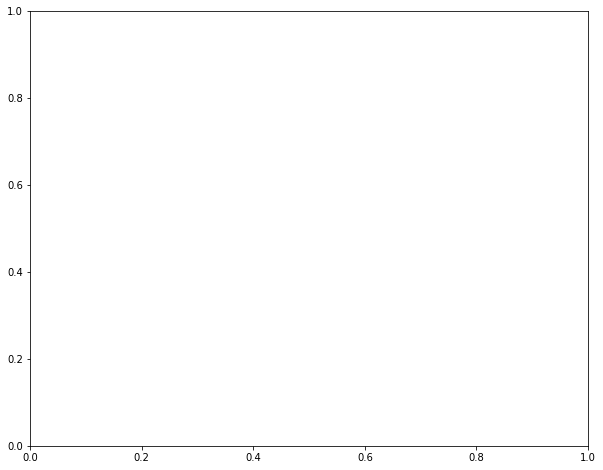

In [37]:
RandomForest = RandomForestClassifier()
y_pred,y_prob,model_obj = model(RandomForest,X_train, y_train, X_test, y_test,X_train.columns)